### MRI brain tumor detection dataset
Dataset link: https://www.kaggle.com/datasets/navoneel/brain-mri-images-for-brain-tumor-detection

### Import packages

In [1]:
import numpy as np

import torch
# DataLoader object is going to help us to iterate through our data very easily.It help us to break out our dataset into mini batches.
from torch.utils.data import Dataset, DataLoader 

# glob: glob go to the directory of our dataset and grab all the images.
import glob

# matplotlib: visualizing stuff in python
import matplotlib.pyplot  as plt

# sklearn are used to evaluate the performance of our model. Confusion Matrix is a way to numerically represent four different combinations of right or wrong for our dataset.
# accuracy score: to evaluate the performance of their classifier.
# <!-- ![img alt text](confusion_matrix.png) -->
from sklearn.metrics import confusion_matrix, accuracy_score

# cv2 is a computer vision package. It helps to read image data and video data.
import cv2

Matplotlib is building the font cache; this may take a moment.


### Reading the Images - Preprocessing

In [18]:
tumor = []
path = "./brain_tumor_dataset/yes/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    tumor.append(img)

In [19]:
len(tumor)

154

In [20]:
for img in tumor:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [21]:
healthy = []
path = "./brain_tumor_dataset/no/*jpg"
# glob has a subpackage iglob. iglob takes the diretory path.
for f in glob.iglob(path):
    # cv2 gives an ability to read multi-channel images. Channels like Red, Green, Blue channel.
    img = cv2.imread(f)

    # We have to fix the length and width of the images of the dataset.
    img = cv2.resize(img, (128,128))
    
    # split: When we pass our image to this function. It returns three values, order is B, G, R. Basically, we are grabing the image and splitting it to the channels
    b, g, r = cv2.split(img)

    # merge: to put the channels in conventional order(RGB). Basically, we are reording the channels and put them back to the original image. 
    img = cv2.merge([r,g,b])
    
    healthy.append(img)

In [22]:
len(healthy)

91

In [23]:
for img in healthy:
    print(img.shape)
# (hight, width, channels)
# (218, 180, 3)

(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 128, 3)
(128, 

In [25]:
# Convert the lists to numpy arrays.
healthy = np.array(healthy)
tumor = np.array(tumor)

In [27]:
tumor.shape
# (154, 128, 128, 3)
# We have 154 images. 
# Each of image has 3 channels
# Each channel has width and height of 128

(154, 128, 128, 3)

In [28]:
healthy.shape

(91, 128, 128, 3)

In [30]:
# We need to pass the arrays in the form of the tuple
All = np.concatenate((healthy,tumor))


In [31]:
All.shape

(245, 128, 128, 3)

### Visualizing Brain MRI images

In [47]:
# 5 is not included. It randomly choses integer value between 0 & 5.
# 3 means, i want to select 3 random numbers b/w values 0 - 5
print(np.random.choice(5,3))

# if we don't want the choice to be repeated
print(np.random.choice(5,3, replace=False))


[3 3 4]
[1 4 2]


In [49]:
healthy[0].shape

(128, 128, 3)

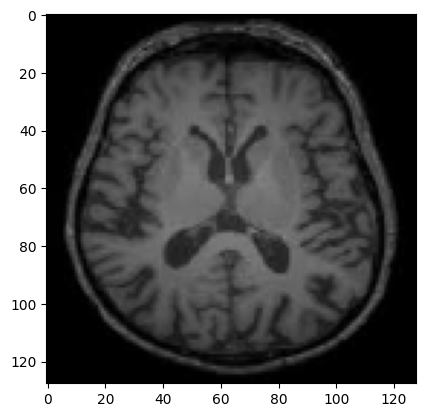

In [50]:
plt.imshow(healthy[0])

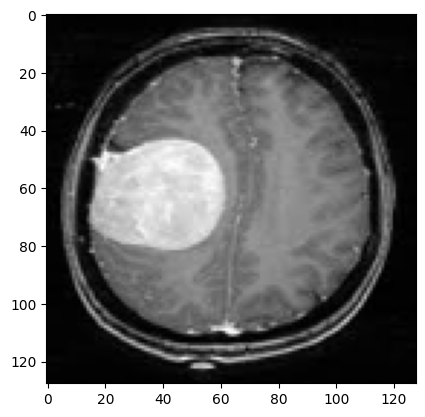

In [51]:
plt.imshow(tumor[0])

In [85]:
def plot_random(healthy, tumor, num=5):
    healthy_images = healthy[np.random.choice(healthy.shape[0],num, replace=False)]
    tumor_images = tumor[np.random.choice(tumor.shape[0],num, replace=False)]

    plt.figure(figsize=(16,9))
    for i in range(num):
        # In matplotlib sublots are not indexed from zero. They are indexed from one. 
        # sublot(Row, Columns in Row, subplot no.)
        plt.subplot(1,num, i + 1)
        plt.title("healthy")
        plt.imshow(healthy_images[i])

    plt.figure(figsize=(16,9))
    for i in range(num):
        plt.subplot(1,num, i + 1)
        plt.title("tumor")
        plt.imshow(tumor_images[i])


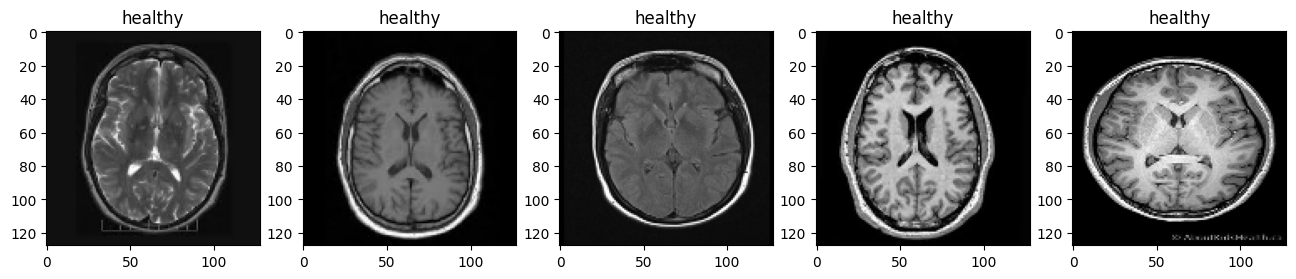

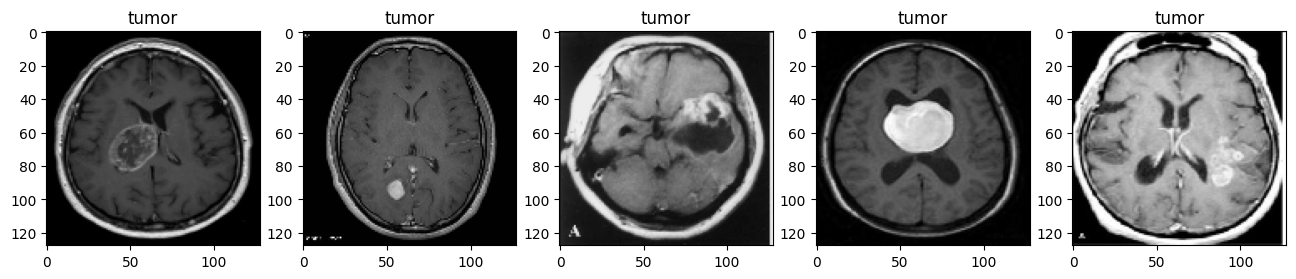

In [86]:
plot_random(healthy,tumor)